In [33]:
# Logistic Regression
### logistic regression is a linear classifier hence we will see linear classifing boundaries

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [34]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:

## feature scaling is required in logistic regression



# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred=classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


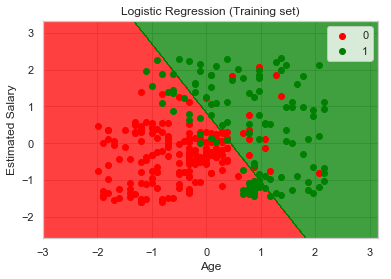

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


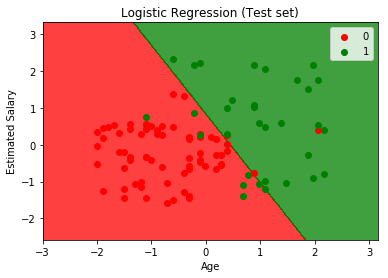

In [34]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [42]:
classifier.score(X_test,y_test)

0.89

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
accuracy=cross_val_score(estimator=classifier,cv=10,X=X_train,y=y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\te

In [45]:
accuracy.mean() # on an average of 82% of the accuracy on prediction

0.827081942899518

In [44]:
### lets try some grid search

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ],
       'class_weight' : ['balanced'],
        'C':[1000]}

In [48]:
gr=GridSearchCV(estimator=classifier,cv=10,param_grid=param,n_jobs=-1,verbose=1)
gr.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight': ['balanced'], 'C': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [49]:
gr.best_estimator_

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [50]:
gr.score(X_test,y_test)

0.89

# project on 

In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [72]:
test=pd.read_csv("C://Users//sandY//Downloads//test.csv")

In [73]:
train=pd.read_csv("C://Users//sandY//Downloads//train.csv")

In [74]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
train.shape

(891, 12)

In [77]:
test.shape

(418, 11)

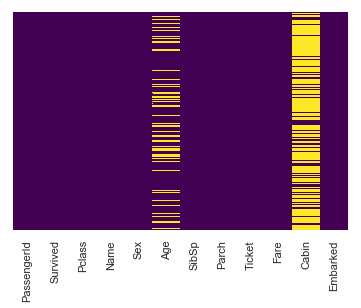

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') ##### heat map of null values horizantal lines represent 

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

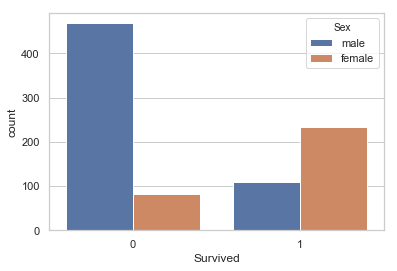

In [80]:
sns.countplot("Survived",hue="Sex",data=train)

In [81]:
### servival according to class

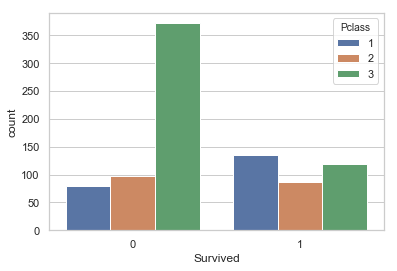

In [82]:
sns.countplot("Survived",hue="Pclass",data=train)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A988DCE358>,
      dtype=object)

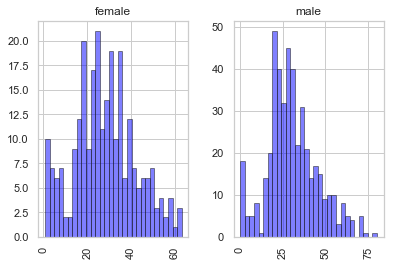

In [83]:
train["Age"].hist(bins=30,color=["blue"],alpha=0.5,edgecolor="k",by=train.Sex)

In [84]:
### lets try imputation

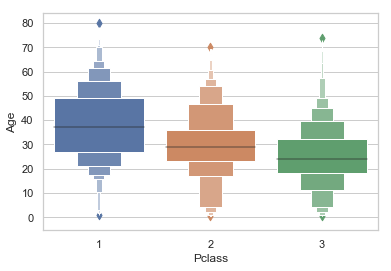

In [85]:
sns.boxenplot("Pclass","Age",data=train)

In [86]:
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [87]:
def impute(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [88]:
train["Age"]=train[["Age","Pclass"]].apply(impute,axis=1)

In [89]:
train["Age"].isnull().sum()

0

In [90]:
train.drop('Cabin',axis=1,inplace=True)

In [91]:
train.dropna(inplace=True,axis=0)

In [92]:
train1=train

In [93]:
train1=pd.get_dummies(train[["Age","Embarked"]],drop_first=True)

In [94]:
train.drop(["Ticket","Name"],axis=1,inplace=True)

In [95]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [96]:
train=pd.get_dummies(train,drop_first=True)

In [97]:
X=train.drop("Survived",axis=1).values

In [98]:
y=train["Survived"].values

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
confusion_matrix(y_test,predictions)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [103]:
logmodel.score(X_test,y_test)

0.8202247191011236

In [104]:
acc=cross_val_score(logmodel,X_train,y_train,n_jobs=-1,cv=10)

In [111]:
acc.mean(),X_train.shape

(0.7960707780379911, (622, 9))

In [106]:
param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ],
       'class_weight' : ['balanced'],
        'C':[1000,1,10]}

In [107]:
gr=GridSearchCV(estimator=classifier,cv=10,param_grid=param,n_jobs=-1,verbose=1)
gr.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:    3.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.6s finished
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight': ['balanced'], 'C': [1000, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [109]:
gr.best_estimator_

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [110]:
logmodel.coef_

array([[ 4.07955382e-04, -7.86365405e-01, -2.63396134e-02,
        -2.12110745e-01, -9.70466787e-02,  4.63350974e-03,
        -2.34157562e+00, -1.74595104e-02, -1.93376424e-01]])

In [ ]:
X[1]

# lets try bank data 

In [193]:
import pandas as pd
data=pd.read_csv("C://Users//sandY//Desktop//Bank Data.csv")

In [122]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Random,Select
45208,72.000000,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,NaN,No
45209,57.000000,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,NaN,No
45210,37.000000,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17.0,nov,361.0,2.0,188.0,11.0,other,no,NaN,No
45211,40.936210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45212,10.618762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
data.shape

(45213, 19)

In [124]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Random', 'Select'],
      dtype='object')

In [125]:

for i in ("job","marital","education","default","housing","loan","contact","month","poutcome"):
    
    print("col is ",i,data[i].unique())

col is  job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan]
col is  marital ['married' 'single' 'divorced' nan]
col is  education ['tertiary' 'secondary' 'unknown' 'primary' nan]
col is  default ['no' 'yes' nan]
col is  housing ['yes' 'no' nan]
col is  loan ['no' 'yes' nan]
col is  contact ['unknown' 'cellular' 'telephone' nan]
col is  month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'
 nan]
col is  poutcome ['unknown' 'failure' 'other' 'success' nan]


In [126]:
data.isnull().sum()

age              0
job              2
marital          2
education        2
default          2
balance          2
housing          2
loan             2
contact          2
day              2
month            2
duration         2
campaign         2
pdays            2
previous         2
poutcome         2
y                2
Random       16252
Select           2
dtype: int64

In [194]:
data.drop("Random",axis=1,inplace=True)


In [195]:
data.dropna(axis=0,inplace=True)

In [129]:
data.shape

(45211, 18)

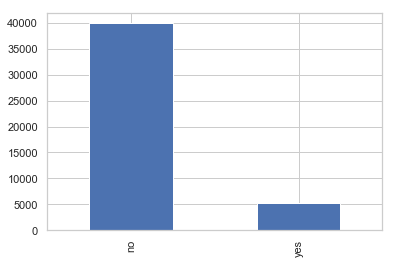

In [130]:
data["y"].value_counts().plot(kind="bar")

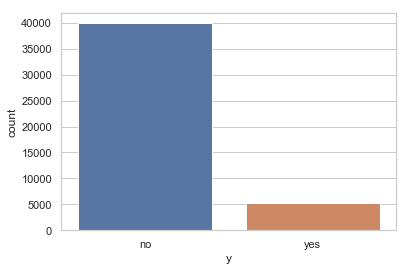

In [131]:
sns.countplot('y',data=data)

In [132]:
data["y"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [133]:
len(data[data["y"]=="no"])/len(data["y"])

0.8830151954170445

In [134]:
data.groupby("y").mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [135]:
data.groupby("marital").mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [136]:
data.groupby("job").mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


([<matplotlib.axis.YTick at 0xa98a492908>,
 <a list of 10 Text yticklabel objects>)

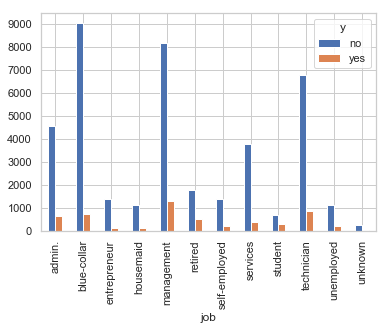

In [137]:
pd.crosstab(data.job,data.y).plot(kind="bar")
plt.yticks(range(0,10000,1000))

([<matplotlib.axis.XTick at 0xa98a52cdd8>,
 <a list of 10 Text xticklabel objects>)

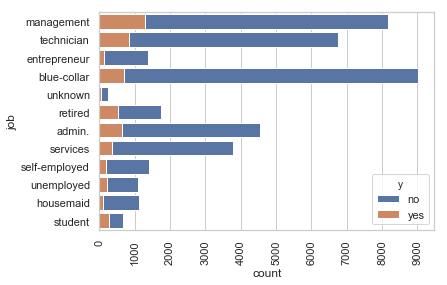

In [138]:
sns.countplot(y="job",hue="y",data=data,dodge=False)   ### dodge ka matlab hota he ki ek k uper ek but do not add
plt.xticks(rotation=90)
plt.xticks(range(0,10000,1000))

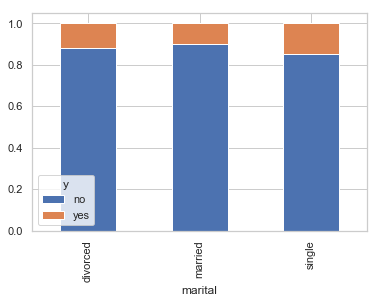

In [139]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True) ## it gives percentage 

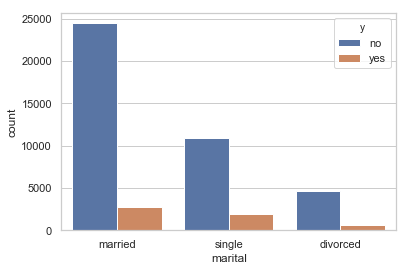

In [140]:
sns.countplot("marital",hue="y",data=data,dodge=True)

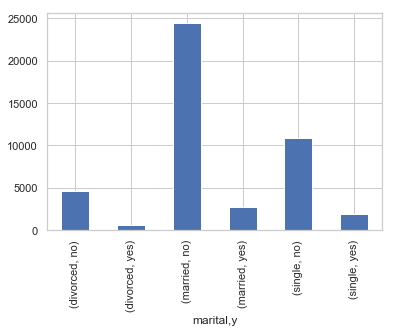

In [141]:
data.groupby("marital")["y"].value_counts().plot(kind="bar")

In [196]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17]]

In [143]:
X1=data.drop("y",axis=1).values ## another way

In [197]:
y=data.iloc[:,16].values

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# using smote

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

# Roc curve

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [214]:
logit_roc_auc = roc_auc_score(y_test, log.predict(X_test))


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [229]:
from sklearn.linear_model import LogisticRegression

In [238]:
log=LogisticRegression()

In [239]:
log.fit(X_train,y_train)

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [240]:
X=pd.get_dummies(X,drop_first=True)

Exception: Data must be 1-dimensional

In [200]:
X=X.iloc[:,:].values

In [241]:
y_pred=log.predict(X_test)

In [242]:
confusion_matrix(y_test,y_pred)

array([[11628,   341],
       [ 1040,   555]], dtype=int64)

In [243]:
log.score(X_test,y_test)

0.8981863757003834

In [244]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: y                AIC:              inf   
Date:               2019-04-13 21:41 BIC:              inf   
No. Observations:   31647            Log-Likelihood:   -inf  
Df Model:           42               LL-Null:          0.0000
Df Residuals:       31604            LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     8.0000                                   
--------------------------------------------------------------
          Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------
x1       -0.0147    0.0022   -6.7290  0.0000  -0.0190  -0.0104
x2        0.0000    0.0000    2.5973  0.0094   0.0000   0.0000
x3        0.0030    0.0029    1.0269  0.3045  -0.0027   0.0087
x4        0.0043    0.0001   54.6417  0.0000   0.0042   0.0045
x5       -0.0856    0.012

In [218]:
from sklearn.preprocessing import StandardScaler

In [227]:
y_test.drop("no",axis=1,inplace=True)

In [228]:
y_test=y_test.iloc[:,:].values

In [237]:
y_train=pd.get_dummies(pd.DataFrame(y_train,columns=["target"]),drop_first=True).values

In [249]:
confusion_matrix(y_test,result.predict(X_test)>0.5)

array([[11616,   353],
       [ 1037,   558]], dtype=int64)

# roc curve

In [250]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)

In [251]:
logit_roc_auc

0.6597360579616465

In [253]:
log.predict_proba(X_test)[:,1]

array([0.00475845, 0.81805062, 0.01520929, ..., 0.00647337, 0.03322624,
       0.04766345])

In [254]:
fpr,tpr,threhold=roc_curve(y_test,log.predict_proba(X_test)[:,1])

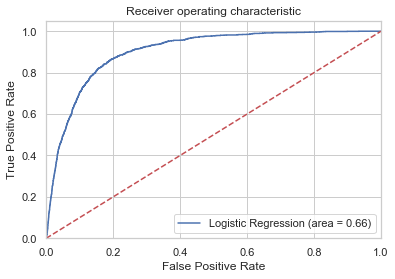

In [256]:
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8